<a href="https://colab.research.google.com/github/nithisharul/Handwritten-Digits-Recognition-using-CNN-Deep-Learning---TensorFlow-/blob/main/Digit_Classification_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project builds a handwritten digit classification model using TensorFlow and the MNIST dataset. The model is trained on grayscale images of digits (0–9) and learns to recognize numerical patterns through a neural network. The project covers data preprocessing, model training, and evaluation for accurate digit prediction.

In [14]:
import tensorflow as tf
import numpy as np

In [5]:
#loading dataset
mnist = tf.keras.datasets.mnist


In [4]:
#creating Training and Testing Split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

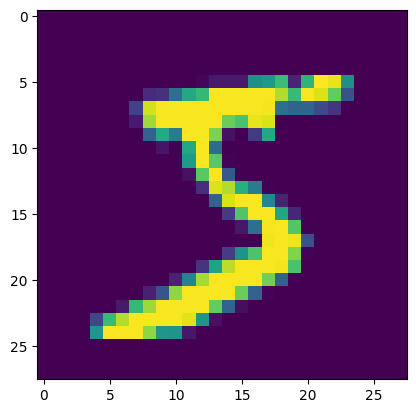

In [8]:
#importing matplotlib for plotting purposes
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

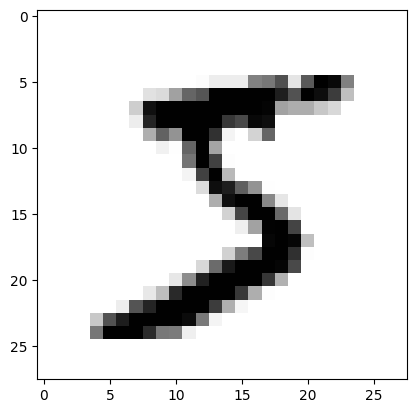

In [9]:
#to show image in binary color(black,White)
plt.imshow(x_train[0], cmap=plt.cm.binary)


We need to Normalize the Dataset to a scale of 0 to 1

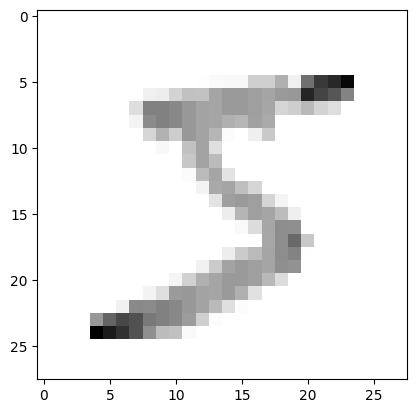

In [10]:
#Normalizatiion
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)


In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

As we can see the data has been normalised

In [17]:
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension",x_trainr.shape)
print("Testing Sampled dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Sampled dimension (10000, 28, 28, 1)


CREATING A DEEP NEURAL NETWORK

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPooling2D

In [25]:
model = Sequential()

# First Convolution Layer
model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected layer-2
model.add(Dense(32))
model.add(Activation("relu"))

# Output layer
model.add(Dense(10))
model.add(Activation("softmax"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
print ("Total Training Samples=" ,len(x_trainr))

Total Training Samples= 60000


In [31]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [32]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 70s 51ms/step - accuracy: 0.7662 - loss: 0.6922 - val_accuracy: 0.9540 - val_loss: 0.1456
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 68s 52ms/step - accuracy: 0.9648 - loss: 0.1144 - val_accuracy: 0.9632 - val_loss: 0.1270
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 67s 51ms/step - accuracy: 0.9755 - loss: 0.0800 - val_accuracy: 0.9769 - val_loss: 0.0764
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 65s 49ms/step - accuracy: 0.9820 - loss: 0.0586 - val_accuracy: 0.9774 - val_loss: 0.0708
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9846 - loss: 0.0485 - val_accuracy: 0.9824 - val_loss: 0.0577


PREDICTING THE DIGITS

In [38]:
predictions = model.predict(x_testr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


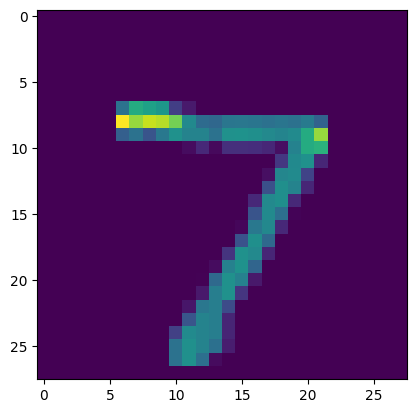

In [40]:
plt.imshow(x_test[0])

In [39]:
print(np.argmax(predictions[0]))

7


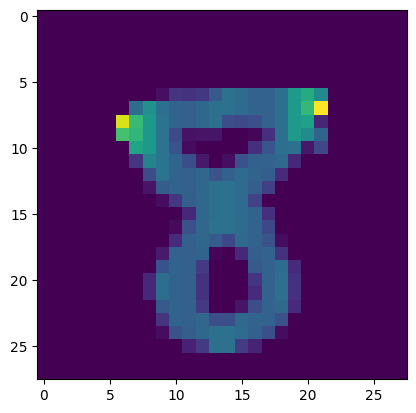

In [41]:
plt.imshow(x_test[128])

In [42]:
print(np.argmax(predictions[128]))

8
